### Stock Performance Analysis

### TOC

1. [Create a Class](#1)
2. [Download Data](#2)
3. [Compare Visually](#3)
4. [Tabulate Performance](#4) 

***

#### 1. Create a Class<a id="1"></a>

- Instantiate a stock object with a specified symbol, starting, and ending date

In [6]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, timedelta



class SYM:
    """Instantiate a stock object 
    """
    
    # Get today's date as "DD-Month-YYYY"
    today = date.today().strftime("%Y-%m-%d") 

    
    def __init__(self, symbol, start_date, end_date=today):
        # Define the ticker symbol for SPY
        self.symbol = symbol
        self.start_date=start_date #"2023-01-01"
        self.end_date=end_date #"2023-06-16"

        # Download historical data using yfinance
        self.df = pd.DataFrame(yf.download(self.symbol, start=self.start_date, end=self.end_date))

        # Print the downloaded data
        
    def df(self):
        """return a dataframe
        """
        
        return self.df_sym
    
    def pct_change_days(self, days):
        """calculate closing price daily percent change
           - to change frequency, use, e.g., .resample("M").sum()
        """
        
        calc = self.df['Close'].pct_change() * 100
        
        return calc
    
    def normalize(self):
        """Normalize closing data to the initial value
        """

        close_N=100*(self.df["Close"]/self.df["Close"][0]) #in percent

        return close_N



#### 2. Download Data<a id="2"></a>

- List stock symbols
- Download data

In [7]:
lst_stocks=["SPY", "QQQ", "DIA"] #change as needed
initial_date="2022-10-31" #change as needed

dict_syms={}

try:
    for stock in lst_stocks:
        dict_syms[stock]=SYM(stock, initial_date)
except:
    print("Error! Download failed.")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


#### 3. Compare visually<a id="3"></a>

Plot: 
- Percent price change with respect to the initial.
- Da-to-day percent change.

SPY: 13.8%
QQQ: 32.4%
DIA: 4.7%


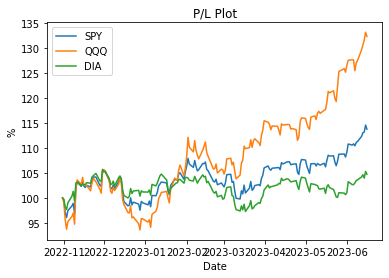

No handles with labels found to put in legend.


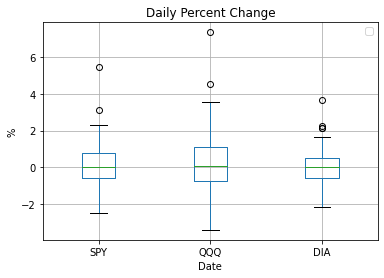

In [8]:
# Plot price w.r.t. the initial in percent.
dict_boxplot={}

for k,v in dict_syms.items():
    plt.plot(v.normalize(), label=k)
    print("%s: %s%%" %(k,round(v.normalize()[-1]-100,1)))

    #make a dataframe for boxplot
    dict_boxplot[k]=v.pct_change_days(1)
plt.legend()
plt.title("P/L Plot")
plt.xlabel("Date")
plt.ylabel("%")
plt.show()

# Plot volatility
df_volatilities=pd.DataFrame(dict_boxplot)
df_volatilities.boxplot()
#for k,v in dict_syms.items():
#    plt.boxplot(v.pct_change_days(1)[1:])
    
plt.legend()
plt.title("Daily Percent Change")
plt.xlabel("Date")
plt.ylabel("%")
plt.show()


#### 4. Tabulate Performance <a id="4"></a>

In [9]:
# calculate percent change for: 1 day, 1 week, 1 month, 3 months, 5 years, 10 years, max

df_all=pd.DataFrame()

sym=[]
day=[]
week=[]
month=[]
year=[]

for k,v in dict_syms.items():
    #take the last value
    sym.append(k)
    day.append(round(100*v.df["Close"].pct_change()[-1],1))
    week.append(round(100*v.df.resample("W").last()["Close"].pct_change(1)[-1],1))
    month.append(round(100*v.df.resample("M").last()["Close"].pct_change(1)[-1],1))
    year.append(round(100*v.df.resample("Y").last()["Close"].pct_change(1)[-1],1))
    #print("%s%%, %s%%, %s%%, %s%%" %(day, week, month, year))
    
#make a dataframe
df_all=pd.DataFrame({"sym": sym, "day": day, "week": week, "month": month, "year": year})

df_all.sort_values(by="month", ascending=False) #choose from day, week, month, and year

,sym,day,week,month,year
1,QQQ,-0.6,3.8,5.7,38.2
0,SPY,-0.7,2.2,5.2,14.9
2,DIA,-0.5,1.1,4.1,3.5


***